In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import tensorflow

# Read the CSV and Perform Basic Data Cleaning

In [66]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [67]:
# Drop unnecesary columns for the model 
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [69]:
# drop the error columns 
df = df.drop(['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2',
              'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2',
              'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 
              'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 
              'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'], axis=1)


### Feature Definitions
#### <b>source:</b> <a href="https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html">NASA Exoplanet Archive</a>  
 
<strong>koi_fpflag_nt</strong>  
A KOI whose light curve is not consistent with that of a transiting planet. This includes, but is not limited to, instrumental artifacts, non-eclipsing variable stars, and spurious (very low SNR) detections  
<strong>koi_fpflag_ss</strong>  
A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. However, self-luminous, hot Jupiters with a visible secondary eclipse will also have this flag set, but with a disposition of PC.  
<strong>koi_fpflag_co</strong>  
The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit, or by the strength of the transit signal in the target's outer (halo) pixels as compared to the transit signal from the pixels in the optimal (or core) aperture.  
<strong>koi_fpflag_ec</strong>    
The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk.    
<strong>koi_period</strong>    
The interval between consecutive planetary transits.  
<strong>koi_period_err1</strong>  
Level of uncertainty for above  
<strong>koi_period_err2</strong>   
Level of uncertainty for above  
<strong>koi_time0bk</strong>  
The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD) minus a constant offset of 2,454,833.0 days. The offset corresponds to 12:00 on Jan 1, 2009 UTC.  
<strong>koi_time0bk_err1</strong>  
Level of uncertainty for above  
<strong>koi_time0bk_err2</strong>  
Level of uncertainty for above  
<strong>koi_impact</strong>  
The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.  
<strong>koi_impact_err1</strong>  
Level of uncertainty for above  
<strong>koi_impact_err2</strong>  
Level of uncertainty for above  
<strong>koi_duration</strong>  
The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact. Contact times are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.  
<strong>koi_duration_err1</strong>  
Level of uncertainty for above  
<strong>koi_duration_err2</strong>  
Level of uncertainty for above  
<strong>koi_depth</strong>  
The fraction of stellar flux lost at the minimum of the planetary transit. Transit depths are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.  
<strong>koi_depth_err1</strong>  
Level of uncertainty for above  
<strong>koi_depth_err2</strong>  
Level of uncertainty for above  
<strong>koi_prad</strong>  
The radius of the planet. Planetary radius is the product of the planet star radius ratio and the stellar radius.  
<strong>koi_prad_err1</strong>  
Level of uncertainty for above  
<strong>koi_prad_err2</strong>  
Level of uncertainty for above  
<strong>koi_teq</strong>  
Approximation for the temperature of the planet. The calculation of equilibrium temperature assumes a) thermodynamic equilibrium between the incident stellar flux and the radiated heat from the planet, b) a Bond albedo (the fraction of total power incident upon the planet scattered back into space) of 0.3, c) the planet and star are blackbodies, and d) the heat is evenly distributed between the day and night sides of the planet.  
<strong>koi_insol</strong>  
Insolation flux is another way to give the equilibrium temperature. It depends on the stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in units relative to those measured for the Earth from the Sun.  
<strong>koi_insol_err1</strong>  
Level of uncertainty for above  
<strong>koi_insol_err2</strong>  
Level of uncertainty for above  
<strong>koi_model_snr</strong>  
Transit depth normalized by the mean uncertainty in the flux during the transits.  
<strong>koi_tce_plnt_num</strong>  
TCE Planet Number federated to the KOI.  
<strong>koi_steff</strong>  
The photospheric temperature of the star.  
<strong>koi_steff_err1</strong>  
Level of uncertainty for above  
<strong>koi_steff_err2</strong>  
Level of uncertainty for above  
<strong>koi_slogg</strong>  
The base-10 logarithm of the acceleration due to gravity at the surface of the star.  
<strong>koi_slogg_err1</strong>  
Level of uncertainty for above  
<strong>koi_slogg_err2</strong>  
Level of uncertainty for above  
<strong>koi_srad</strong>  
The photospheric radius of the star  
<strong>koi_srad_err1</strong>  
Level of uncertainty for above  
<strong>koi_srad_err2</strong>  
Level of uncertainty for above  
<strong>ra</strong>  
KIC Right Ascension  
<strong>dec</strong>  
KIC Declination  
<strong>koi_kepmag</strong>    
Kepler-band (mag)  


# Feature Selection

In [98]:
# Set features
# Initially select all but the error columns

feature_names = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
                 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
                 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff','koi_slogg','koi_srad', 'ra', 'dec', 'koi_kepmag']

X = df[feature_names]

# Target Selection

In [99]:
target_names = df['koi_disposition'].unique()[0:3]
target_names

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [100]:
y  = df["koi_disposition"]

# Create a Train Test Split


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [102]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,133.077240,0.150,3.61600,123.1,1.24,1017,253.30,10.8,1,5737,4.327,1.125,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,132.020050,0.291,2.30900,114.6,0.86,1867,2891.64,13.8,1,5855,4.578,0.797,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,134.460380,0.970,79.89690,641.1,3.21,989,226.81,254.3,1,6328,4.481,0.963,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,174.662240,0.300,2.63120,875.4,2.25,696,55.37,38.4,1,4768,4.536,0.779,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,172.258529,0.831,2.22739,9802.0,12.21,1103,349.40,696.5,1,5712,4.359,1.082,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [103]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
X_scaler = MinMaxScaler().fit(X_train)

# Transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [104]:
# Convert the y values to numerical using label_encoder/to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)


# Train the Model



In [105]:
# Create the model and add layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

inputs = X_train.shape[1]

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=inputs))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))


In [106]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [107]:
 model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               2100      
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 303       
Total params: 12,503
Trainable params: 12,503
Non-trainable params: 0
_________________________________________________________________


In [108]:
 model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2,
)

Epoch 1/200
164/164 - 0s - loss: 0.5079 - accuracy: 0.7358
Epoch 2/200
164/164 - 0s - loss: 0.3768 - accuracy: 0.7906
Epoch 3/200
164/164 - 0s - loss: 0.3694 - accuracy: 0.8003
Epoch 4/200
164/164 - 0s - loss: 0.3673 - accuracy: 0.7952
Epoch 5/200
164/164 - 0s - loss: 0.3599 - accuracy: 0.8108
Epoch 6/200
164/164 - 0s - loss: 0.3597 - accuracy: 0.8104
Epoch 7/200
164/164 - 0s - loss: 0.3554 - accuracy: 0.8119
Epoch 8/200
164/164 - 0s - loss: 0.3518 - accuracy: 0.8169
Epoch 9/200
164/164 - 0s - loss: 0.3487 - accuracy: 0.8135
Epoch 10/200
164/164 - 0s - loss: 0.3503 - accuracy: 0.8192
Epoch 11/200
164/164 - 0s - loss: 0.3472 - accuracy: 0.8194
Epoch 12/200
164/164 - 0s - loss: 0.3466 - accuracy: 0.8203
Epoch 13/200
164/164 - 0s - loss: 0.3425 - accuracy: 0.8253
Epoch 14/200
164/164 - 0s - loss: 0.3411 - accuracy: 0.8262
Epoch 15/200
164/164 - 0s - loss: 0.3399 - accuracy: 0.8276
Epoch 16/200
164/164 - 0s - loss: 0.3393 - accuracy: 0.8272
Epoch 17/200
164/164 - 0s - loss: 0.3389 - accura

Epoch 138/200
164/164 - 0s - loss: 0.2024 - accuracy: 0.9107
Epoch 139/200
164/164 - 0s - loss: 0.2006 - accuracy: 0.9125
Epoch 140/200
164/164 - 0s - loss: 0.1957 - accuracy: 0.9178
Epoch 141/200
164/164 - 0s - loss: 0.2030 - accuracy: 0.9132
Epoch 142/200
164/164 - 0s - loss: 0.1998 - accuracy: 0.9140
Epoch 143/200
164/164 - 0s - loss: 0.2002 - accuracy: 0.9155
Epoch 144/200
164/164 - 0s - loss: 0.2006 - accuracy: 0.9125
Epoch 145/200
164/164 - 0s - loss: 0.1984 - accuracy: 0.9115
Epoch 146/200
164/164 - 0s - loss: 0.1948 - accuracy: 0.9197
Epoch 147/200
164/164 - 0s - loss: 0.1990 - accuracy: 0.9147
Epoch 148/200
164/164 - 0s - loss: 0.1898 - accuracy: 0.9193
Epoch 149/200
164/164 - 0s - loss: 0.1987 - accuracy: 0.9115
Epoch 150/200
164/164 - 0s - loss: 0.1965 - accuracy: 0.9136
Epoch 151/200
164/164 - 0s - loss: 0.1971 - accuracy: 0.9134
Epoch 152/200
164/164 - 0s - loss: 0.1921 - accuracy: 0.9182
Epoch 153/200
164/164 - 0s - loss: 0.1957 - accuracy: 0.9151
Epoch 154/200
164/164 - 

# Quantify Model


In [109]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.3958 - accuracy: 0.8913
Normal Neural Network - Loss: 0.39575839042663574, Accuracy: 0.8913043737411499


In [110]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = np.argmax(model.predict(X_test_scaled), axis=-1)
print(classification_report(encoded_y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

     CONFIRMED       0.79      0.78      0.79       411
FALSE POSITIVE       0.82      0.81      0.82       484
     CANDIDATE       0.98      0.99      0.98       853

      accuracy                           0.89      1748
     macro avg       0.86      0.86      0.86      1748
  weighted avg       0.89      0.89      0.89      1748



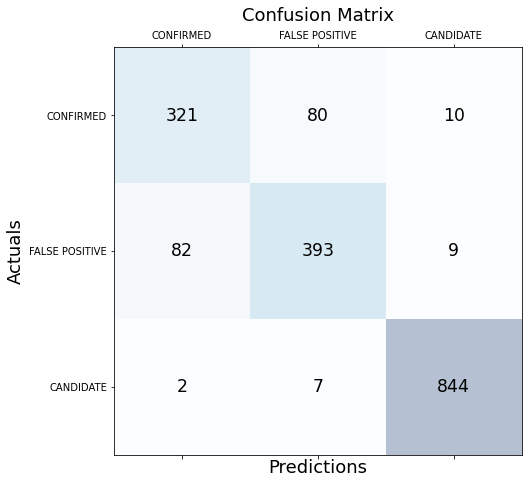

In [111]:
# Create a confusion matrix to visualise the performance 
from sklearn.metrics import confusion_matrix

predictions = np.argmax(model.predict(X_test_scaled), axis=-1)

conf_matrix = confusion_matrix(y_true=encoded_y_test, y_pred=predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
ax.set_xticks([0,1,2])
ax.set_xticklabels(target_names)
plt.ylabel('Actuals', fontsize=18)
ax.set_yticks([0,1,2])
ax.set_yticklabels(target_names)

plt.show()

In [112]:
# Use recursive feature elimination to identify the best performing features
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Initiate RFE cross-validation and fit with a linear regression model
rfecv = RFECV(
    estimator=LinearRegression(),
    min_features_to_select=5,
    step=5,
    n_jobs=-1,
    scoring="r2",
    cv=5,
)

_ = rfecv.fit(X_train_scaled, encoded_y_train)

# Print the best columns
X_train.columns[rfecv.support_]


Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_time0bk', 'koi_impact', 'koi_depth', 'koi_prad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'dec',
       'koi_kepmag'],
      dtype='object')

In [114]:
# Re-select the features based on the RFS
feature_names = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
                 'koi_time0bk', 'koi_impact', 'koi_depth', 'koi_prad', 'koi_teq',
                 'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'dec',
                 'koi_kepmag']

X_train = X_train[feature_names]
X_test = X_test[feature_names]
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [116]:
#  Re-run the model with the new-feature selection
inputs = X_train.shape[1]

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=inputs))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2,
    )

Epoch 1/200
164/164 - 0s - loss: 0.5408 - accuracy: 0.7025
Epoch 2/200
164/164 - 0s - loss: 0.3878 - accuracy: 0.7799
Epoch 3/200
164/164 - 0s - loss: 0.3827 - accuracy: 0.7765
Epoch 4/200
164/164 - 0s - loss: 0.3819 - accuracy: 0.7795
Epoch 5/200
164/164 - 0s - loss: 0.3750 - accuracy: 0.7894
Epoch 6/200
164/164 - 0s - loss: 0.3742 - accuracy: 0.7858
Epoch 7/200
164/164 - 0s - loss: 0.3732 - accuracy: 0.7915
Epoch 8/200
164/164 - 0s - loss: 0.3707 - accuracy: 0.7961
Epoch 9/200
164/164 - 0s - loss: 0.3675 - accuracy: 0.8007
Epoch 10/200
164/164 - 0s - loss: 0.3676 - accuracy: 0.8003
Epoch 11/200
164/164 - 0s - loss: 0.3668 - accuracy: 0.8001
Epoch 12/200
164/164 - 0s - loss: 0.3685 - accuracy: 0.7984
Epoch 13/200
164/164 - 0s - loss: 0.3646 - accuracy: 0.8013
Epoch 14/200
164/164 - 0s - loss: 0.3653 - accuracy: 0.8047
Epoch 15/200
164/164 - 0s - loss: 0.3623 - accuracy: 0.8106
Epoch 16/200
164/164 - 0s - loss: 0.3599 - accuracy: 0.8095
Epoch 17/200
164/164 - 0s - loss: 0.3611 - accura

Epoch 137/200
164/164 - 0s - loss: 0.2314 - accuracy: 0.8951
Epoch 138/200
164/164 - 0s - loss: 0.2378 - accuracy: 0.8913
Epoch 139/200
164/164 - 0s - loss: 0.2364 - accuracy: 0.8911
Epoch 140/200
164/164 - 0s - loss: 0.2354 - accuracy: 0.8926
Epoch 141/200
164/164 - 0s - loss: 0.2330 - accuracy: 0.8945
Epoch 142/200
164/164 - 0s - loss: 0.2322 - accuracy: 0.8949
Epoch 143/200
164/164 - 0s - loss: 0.2339 - accuracy: 0.8962
Epoch 144/200
164/164 - 0s - loss: 0.2300 - accuracy: 0.8943
Epoch 145/200
164/164 - 0s - loss: 0.2358 - accuracy: 0.8911
Epoch 146/200
164/164 - 0s - loss: 0.2324 - accuracy: 0.8966
Epoch 147/200
164/164 - 0s - loss: 0.2328 - accuracy: 0.8940
Epoch 148/200
164/164 - 0s - loss: 0.2312 - accuracy: 0.8964
Epoch 149/200
164/164 - 0s - loss: 0.2309 - accuracy: 0.8947
Epoch 150/200
164/164 - 0s - loss: 0.2280 - accuracy: 0.8989
Epoch 151/200
164/164 - 0s - loss: 0.2291 - accuracy: 0.8968
Epoch 152/200
164/164 - 0s - loss: 0.2245 - accuracy: 0.9004
Epoch 153/200
164/164 - 

In [117]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.3301 - accuracy: 0.8924
Normal Neural Network - Loss: 0.3301277756690979, Accuracy: 0.8924484848976135


# Hyperparameter Tuning


In [129]:
import keras_tuner as kt

def build_model(hp):
    model = tensorflow.keras.Sequential()

    # Tune the number of units in the layers
    hp_units1 = hp.Int('units1', min_value=50, max_value=400, step=50)
    hp_units2 = hp.Int('units2', min_value=50, max_value=400, step=50)
        
    # Add the layers      
    model.add(Dense(units=hp_units1, activation='relu', input_dim=inputs))
    model.add(Dense(units=hp_units2, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1, 0.2, 0.3])

    model.compile(
      optimizer = tensorflow.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss = 'categorical_crossentropy',
      metrics = ['accuracy']
    )

    return model

# HyperBand algorithm from keras_tuner
tuner = kt.Hyperband(
        build_model,
        objective='val_accuracy',
        max_epochs=1000,
        directory='hp_dir',
        project_name='neural_net_tuning'
        )

# Perform the hyperperameter tuning 
tuner.search(X_train_scaled, y_train_categorical, epochs=200, validation_split=0.2)

Trial 257 Complete [00h 00m 01s]
val_accuracy: 0.769304096698761

Best val_accuracy So Far: 0.8045758008956909
Total elapsed time: 00h 04m 35s
INFO:tensorflow:Oracle triggered exit


In [130]:
# Extract the best model and evaluate with the test data
# Print accuracy and loss with test data
best_model = tuner.get_best_models(num_models=1)[0]
loss, accuracy = best_model.evaluate(X_test_scaled, y_test_categorical)

55/55 [==============================] - 0s 720us/step - loss: 0.4021 - accuracy: 0.7706


In [131]:
# Print optimal hyperparamaters
for h_param in [f"units{i}" for i in range(1,3)] + ['learning_rate']:
    print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

units1 300
units2 350
learning_rate 0.001


In [132]:
# Create the adjusted model
inputs = X_train.shape[1]

model = Sequential()
model.add(Dense(units=300, activation='relu', input_dim=inputs))
model.add(Dense(units=350, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

# Compile the adjusted model
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

In [133]:
# Fit the adjusted model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2,
)

Epoch 1/200
164/164 - 0s - loss: 0.4230 - accuracy: 0.7498
Epoch 2/200
164/164 - 0s - loss: 0.3944 - accuracy: 0.7658
Epoch 3/200
164/164 - 0s - loss: 0.3896 - accuracy: 0.7744
Epoch 4/200
164/164 - 0s - loss: 0.3917 - accuracy: 0.7721
Epoch 5/200
164/164 - 0s - loss: 0.3931 - accuracy: 0.7612
Epoch 6/200
164/164 - 0s - loss: 0.3837 - accuracy: 0.7793
Epoch 7/200
164/164 - 0s - loss: 0.3812 - accuracy: 0.7793
Epoch 8/200
164/164 - 0s - loss: 0.3756 - accuracy: 0.7894
Epoch 9/200
164/164 - 0s - loss: 0.3732 - accuracy: 0.7953
Epoch 10/200
164/164 - 0s - loss: 0.3751 - accuracy: 0.7892
Epoch 11/200
164/164 - 0s - loss: 0.3765 - accuracy: 0.7793
Epoch 12/200
164/164 - 0s - loss: 0.3741 - accuracy: 0.7919
Epoch 13/200
164/164 - 0s - loss: 0.3663 - accuracy: 0.8009
Epoch 14/200
164/164 - 0s - loss: 0.3569 - accuracy: 0.8129
Epoch 15/200
164/164 - 0s - loss: 0.3525 - accuracy: 0.8179
Epoch 16/200
164/164 - 0s - loss: 0.3548 - accuracy: 0.8125
Epoch 17/200
164/164 - 0s - loss: 0.3469 - accura

164/164 - 0s - loss: 0.2635 - accuracy: 0.8825
Epoch 138/200
164/164 - 0s - loss: 0.2676 - accuracy: 0.8817
Epoch 139/200
164/164 - 0s - loss: 0.2758 - accuracy: 0.8785
Epoch 140/200
164/164 - 0s - loss: 0.2680 - accuracy: 0.8756
Epoch 141/200
164/164 - 0s - loss: 0.2584 - accuracy: 0.8835
Epoch 142/200
164/164 - 0s - loss: 0.2574 - accuracy: 0.8867
Epoch 143/200
164/164 - 0s - loss: 0.2630 - accuracy: 0.8798
Epoch 144/200
164/164 - 0s - loss: 0.2595 - accuracy: 0.8829
Epoch 145/200
164/164 - 0s - loss: 0.2614 - accuracy: 0.8831
Epoch 146/200
164/164 - 0s - loss: 0.2646 - accuracy: 0.8804
Epoch 147/200
164/164 - 0s - loss: 0.2567 - accuracy: 0.8863
Epoch 148/200
164/164 - 0s - loss: 0.2583 - accuracy: 0.8837
Epoch 149/200
164/164 - 0s - loss: 0.2552 - accuracy: 0.8856
Epoch 150/200
164/164 - 0s - loss: 0.2590 - accuracy: 0.8833
Epoch 151/200
164/164 - 0s - loss: 0.2576 - accuracy: 0.8863
Epoch 152/200
164/164 - 0s - loss: 0.2605 - accuracy: 0.8827
Epoch 153/200
164/164 - 0s - loss: 0.2

In [134]:
# Qunatify the adjusted model
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.3204 - accuracy: 0.8976
Normal Neural Network - Loss: 0.32036757469177246, Accuracy: 0.8975972533226013


In [135]:
# Calculate classification report
predictions = np.argmax(model.predict(X_test_scaled), axis=-1)
print(classification_report(encoded_y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

     CONFIRMED       0.80      0.78      0.79       411
FALSE POSITIVE       0.83      0.82      0.82       484
     CANDIDATE       0.98      1.00      0.99       853

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



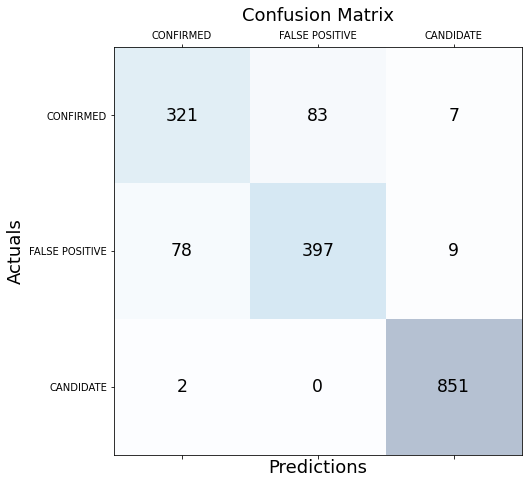

In [136]:
# Create a confusion matrix to visualise the performance of the adjusted model
predictions = np.argmax(model.predict(X_test_scaled), axis=-1)

conf_matrix = confusion_matrix(y_true=encoded_y_test, y_pred=predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
ax.set_xticks([0,1,2])
ax.set_xticklabels(target_names)
plt.ylabel('Actuals', fontsize=18)
ax.set_yticks([0,1,2])
ax.set_yticklabels(target_names)

plt.show()

# Save the Model

In [181]:
# Save the model
filename = 'Model 2 - Deep_learning.h5'
model.save(filename)